# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Table Of Contents</p>

* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA LOADING](#2)
    
* [3. DATA EXPLORATION](#3) 
   
* [4. DATA TRANSFORMATION AND PREPROCESSING](#4) 
    
* [5. MODEL BUILDING AND FITTING](#5) 
     
* [6. SUMMARY](#6)
    
* [7. END](#7)


 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib

In [6]:
sns.set_theme()

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Data</p>

After loading the data, we first inspect the two data sets using `.head()` and `.info()`

In [7]:
US_traffic_2015 = pd.read_csv("dot_traffic_2015.txt.gz")
US_traffic_stations_2015 = pd.read_csv("dot_traffic_stations_2015.txt.gz")

In [8]:
US_traffic_2015.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,83,61,55,35,29,21,23,9,7,15


In [9]:
US_traffic_2015.set_index("date").sort_index()

,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1,5,3,East,19,3U,Urban: Principal Arterial - Other,1,1,3,...,154,169,155,136,132,111,65,57,55,15
2015-01-01,1,5,7,West,40,3R,Rural: Principal Arterial - Other,1,1,3,...,184,174,157,120,71,56,55,36,34,15
2015-01-01,1,5,3,East,13,1U,Urban: Principal Arterial - Interstate,3,1,3,...,1063,1108,949,813,742,583,402,330,257,15
2015-01-01,1,5,9,North-South or Northeast-Southwest combined (A...,45,1R,Rural: Principal Arterial - Interstate,0,1,3,...,1698,1710,1603,1518,1205,896,709,499,332,15
2015-01-01,1,5,1,North,41,4R,Rural: Minor Arterial,0,1,3,...,135,125,101,138,97,66,63,53,26,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,31,5,7,West,53,3R,Rural: Principal Arterial - Other,1,12,3,...,1256,1067,759,542,380,261,218,208,138,15
2015-12-31,31,5,1,North,30,3U,Urban: Principal Arterial - Other,2,12,3,...,506,540,478,350,252,219,177,119,111,15
2015-12-31,31,5,5,South,44,2U,Urban: Principal Arterial - Other Freeways or ...,2,12,3,...,1242,1095,863,676,470,346,277,195,110,15


In [10]:
US_traffic_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

In [11]:
US_traffic_stations_2015.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,...,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,...,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


In [12]:
US_traffic_stations_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

**About the data**

The dataset `US_traffic_2015` is a 7140391 rows × 37 columns large dataset which is a collection of the volume of the traffic at an hourly frequency recorded and contains **13 features** evaluated in time and space dimensions/perspectives including 

1. **Time Dimension:**
    * date                                      
    * day_of_data                                  
    * day_of_week
    * year_of_data
    * month_of_data 
 

|Column Names|Data Type|
|-|-|
date|String
day_of_data|int64
day_of_week|int64
year_of_data|int64
month_of_data|int64 


   

    
2. **Space Dimention:**
    * direction_of_travel
    * fips_state_code  
    * functional_classification_name             
    * lane_of_travel                               
    * record_type                                  
    * restrictions                              
    * station_id 


|Column Names|Data Type|
|-|-|
direction_of_travel|int64 
fips_state_code |int64
functional_classification_name|String
lane_of_travel |int64
record_type |int64 
restrictions | String
station_id | int64|







The dataset `US_traffic_stations_2015` is a 28466 rows × 55 columns dataset which is a rich collection of the stations specific informations such as latitude, longitude, method of data retrieval, volume counting and etc


To further explore the relationship between the two datasets, I run the following loop to see the common features among the two datasets, as eventually, I would like to merge this two datasets together for modelling. We could see from the ouput that the two datasets share **9 common features**.

In [13]:
common_features = []

for i in US_traffic_stations_2015.columns:
    if i in US_traffic_2015.columns:
        print(i)
        common_features.append(i)

direction_of_travel
direction_of_travel_name
fips_state_code
functional_classification
functional_classification_name
lane_of_travel
record_type
station_id
year_of_data


### Merging two datasets together

In [14]:
df_traffic = US_traffic_2015.merge(US_traffic_stations_2015, on = ["station_id","direction_of_travel"],how = "inner")

The dataset is very large, I will only select the columns of interest for future use

### Selecting columns of interest

In [15]:
columns_select = ['month_of_data',
                  'date',       
       'day_of_data', 
       'day_of_week', 
       'direction_of_travel',
       'fips_state_code_x',
       'station_id', 
       'functional_classification_x',
       'lane_of_travel_x', 
       'fips_county_code',
       'latitude',
       'longitude',
       'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_1400',
       'traffic_volume_counted_after_1400_to_1500',
       'traffic_volume_counted_after_1500_to_1600',
       'traffic_volume_counted_after_1600_to_1700',
       'traffic_volume_counted_after_1700_to_1800',
       'traffic_volume_counted_after_1800_to_1900',
       'traffic_volume_counted_after_1900_to_2000',
       'traffic_volume_counted_after_2000_to_2100',
       'traffic_volume_counted_after_2100_to_2200',
       'traffic_volume_counted_after_2200_to_2300',
       'traffic_volume_counted_after_2300_to_2400']

In [16]:
df_traffic.describe()

,day_of_data,day_of_week,direction_of_travel,fips_state_code_x,lane_of_travel_x,month_of_data,record_type_x,restrictions,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,...,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,year_of_data_y,year_station_discontinued,year_station_established
count,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,25026066.0,0.0,2.502607e+07,2.502607e+07,...,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,2.502607e+07,25026066.0,2.502607e+07,2.502607e+07
mean,1.572558e+01,4.014064e+00,3.804038e+00,2.798812e+01,1.564384e+00,6.510271e+00,3.0,NaN,1.146890e+02,7.853391e+01,...,1.080855e+00,2.120660e+00,2.610385e+00,2.664246e+00,5.945518e-01,1.924286e+00,1.755826e+00,15.0,3.331094e-01,4.662311e+01
std,8.765075e+00,1.997216e+00,2.247267e+00,1.674734e+01,1.196972e+00,3.444302e+00,0.0,NaN,2.940161e+02,2.115376e+02,...,2.012030e+00,1.356383e+00,1.358583e+00,1.417945e+00,1.194329e+00,1.719217e+00,1.138702e+00,0.0,4.838815e+00,3.951838e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.0,NaN,-1.000000e+00,-1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.0,0.000000e+00,0.000000e+00
25%,8.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,3.0,NaN,1.300000e+01,8.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,15.0,0.000000e+00,6.000000e+00
50%,1.600000e+01,4.000000e+00,4.000000e+00,2.800000e+01,1.000000e+00,6.000000e+00,3.0,NaN,4.300000e+01,2.800000e+01,...,0.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,15.0,0.000000e+00,5.300000e+01
75%,2.300000e+01,6.000000e+00,5.000000e+00,4.200000e+01,2.000000e+00,1.000000e+01,3.0,NaN,1.300000e+02,8.800000e+01,...,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,15.0,0.000000e+00,9.000000e+01
max,3.100000e+01,7.000000e+00,9.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,3.0,NaN,9.999900e+04,8.074100e+04,...,5.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00,15.0,9.900000e+01,9.900000e+01


#### Data Cleaning Step 1: 

From the describe table, there exists negative values in volume numbers which does not make sense, I will replace these negative values as zero 

In [17]:
num = df_traffic._get_numeric_data()
num[num < 0] = 0

In [18]:
df_traffic = df_traffic.loc[:,columns_select]
df_traffic.head()

,month_of_data,date,day_of_data,day_of_week,direction_of_travel,fips_state_code_x,station_id,functional_classification_x,lane_of_travel_x,fips_county_code,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
0,4,2015-04-07,7,3,1,56,000084,3R,1,147,...,129,89,122,124,110,69,73,28,12,6
1,4,2015-04-07,7,3,1,56,000084,3R,1,39,...,129,89,122,124,110,69,73,28,12,6
2,7,2015-07-03,3,6,1,48,000084,5R,0,147,...,17,25,10,20,19,9,9,5,3,4
3,7,2015-07-03,3,6,1,48,000084,5R,0,39,...,17,25,10,20,19,9,9,5,3,4
4,9,2015-09-23,23,4,1,56,000084,3R,1,147,...,370,335,358,364,266,182,167,129,53,17


<a id="3"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Data Exploration</p>


### GETTING THE BIG PICTURE

As there are 36 dimensions of the data (After feature selection), we could view the data from many meaningful perspectives. An intuitive way of looking at the data is:
1. From time dimension:
 * Purly time series data, i.e the 24 hours hourly traffic volume over 2015
 * By month, by day of the week, by date and by day of the hourly traffic volume 


2. From space dimension:
 * hourly traffic volume by state, county, station_id, functional_classification and lane_of_travel etc

From EDA, I think it is important to understand the following:
1. Which day/days in a year would have the largest/least traffic volume?
2. What time/times in a day would have the largest/least traffic volume?
3. Which state/city/ station/stations are the busiest/least busy?
4. Which lanes are the busiest/least busy?
5. Which direction_of_travels are the busiest/least busy?

## From Time Dimension

### 1. Aggregate total traffic volume per hour

In [19]:
agg_hour_daily = df_traffic.groupby(["date"]).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_daily.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11121638,11072566,7784783,5481275,4280195,4889993,6751819,8272270,11040521,15167481,...,32352557,31991001,30939932,28739711,25372736,21250009,17744638,15106230,13448023,9931701
2015-01-02,5505481,4131389,3366306,3682844,5816091,11814275,21228862,30060216,31124990,32809732,...,48195331,48840754,49761477,47468177,38561011,30430171,25532955,21405772,19178163,14042084
2015-01-03,8551455,6035407,4804495,4396234,5264720,7566965,11465046,15575720,20796455,27355236,...,40249526,40607605,39626393,36984192,33309797,27719974,22645608,20336099,18139759,13324682
2015-01-04,8313885,6002778,4589240,3614023,3813650,5409479,7993093,10797991,15167537,21262224,...,38200685,37724577,36133646,32981290,28545874,23507841,19981433,15881272,12711846,9253005
2015-01-05,4875582,3366451,2948346,3625621,7296984,17000664,31137291,41959793,38391326,32736605,...,39940818,44730024,48818817,49104610,36761280,26933784,20215705,17309859,13146586,12977239


In [20]:
## change the column name to make the plot easier to read
agg_hour_daily.columns = np.arange(0,24)

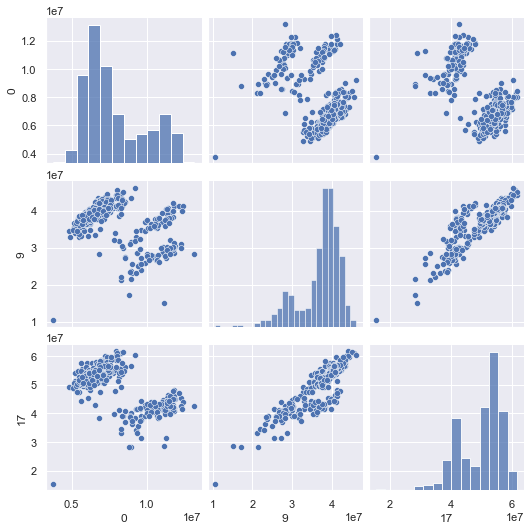

In [21]:
sns.pairplot(agg_hour_daily.iloc[:,[0,9,17]])

From the plot, we could see that there exist strong linear relationship between traffic volumnes from 9-10 and traffic volumnes from 17-18

<AxesSubplot:>

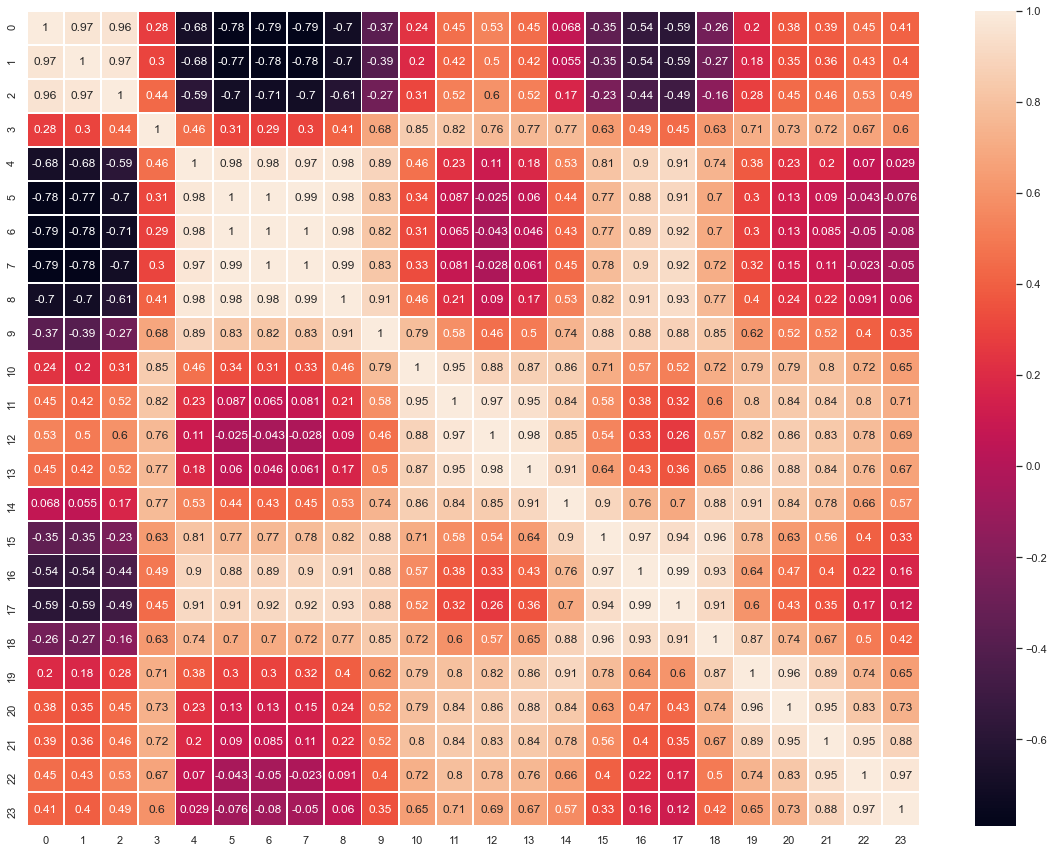

In [22]:
###make a heatmap to see correlations
plt.subplots(figsize=(20,15))
correlation = agg_hour_daily.corr()
sns.heatmap(correlation, annot = True,linewidths=1)

It is obvious that there exists strong positive linear relationship amoung hours (4,5,6,7,8), (19,20,21,22)

In [23]:
correlation

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.971077,0.959986,0.276072,-0.684633,-0.777655,-0.790912,-0.785518,-0.701119,-0.367224,...,0.067505,-0.347598,-0.542419,-0.587808,-0.264649,0.195231,0.377286,0.387043,0.448159,0.411787
1,0.971077,1.000000,0.974998,0.302772,-0.676112,-0.771280,-0.783240,-0.777736,-0.700759,-0.387380,...,0.055349,-0.348696,-0.540061,-0.587082,-0.270895,0.176463,0.349162,0.359493,0.428075,0.395507
2,0.959986,0.974998,1.000000,0.440110,-0.585753,-0.698346,-0.711135,-0.701791,-0.610791,-0.270073,...,0.173725,-0.232219,-0.437499,-0.493526,-0.157215,0.281998,0.446586,0.462669,0.525649,0.487762
3,0.276072,0.302772,0.440110,1.000000,0.458884,0.313120,0.290282,0.300748,0.408648,0.680332,...,0.769798,0.633085,0.494432,0.445828,0.628971,0.713513,0.727314,0.724960,0.674962,0.595047
4,-0.684633,-0.676112,-0.585753,0.458884,1.000000,0.984766,0.976566,0.974447,0.980932,0.888782,...,0.531889,0.813568,0.897488,0.913008,0.742665,0.383638,0.231073,0.195197,0.070183,0.028518
5,-0.777655,-0.771280,-0.698346,0.313120,0.984766,1.000000,0.997835,0.993590,0.979382,0.827591,...,0.437843,0.766724,0.882814,0.908877,0.698176,0.299987,0.133362,0.089672,-0.043169,-0.076499
6,-0.790912,-0.783240,-0.711135,0.290282,0.976566,0.997835,1.000000,0.997908,0.980567,0.818340,...,0.431327,0.768519,0.888409,0.915279,0.703219,0.299773,0.129713,0.085374,-0.049501,-0.080377
7,-0.785518,-0.777736,-0.701791,0.300748,0.974447,0.993590,0.997908,1.000000,0.986930,0.831197,...,0.446341,0.780937,0.897762,0.923463,0.719116,0.317360,0.146689,0.108597,-0.023270,-0.050411
8,-0.701119,-0.700759,-0.610791,0.408648,0.980932,0.979382,0.980567,0.986930,1.000000,0.906367,...,0.525687,0.821076,0.914598,0.934974,0.768028,0.396879,0.241707,0.218769,0.091188,0.059946
9,-0.367224,-0.387380,-0.270073,0.680332,0.888782,0.827591,0.818340,0.831197,0.906367,1.000000,...,0.741215,0.875759,0.878682,0.875225,0.845384,0.622129,0.522629,0.516614,0.398861,0.345155


### Plotting out the aggreated hourly traffic volumes

<AxesSubplot:xlabel='date'>

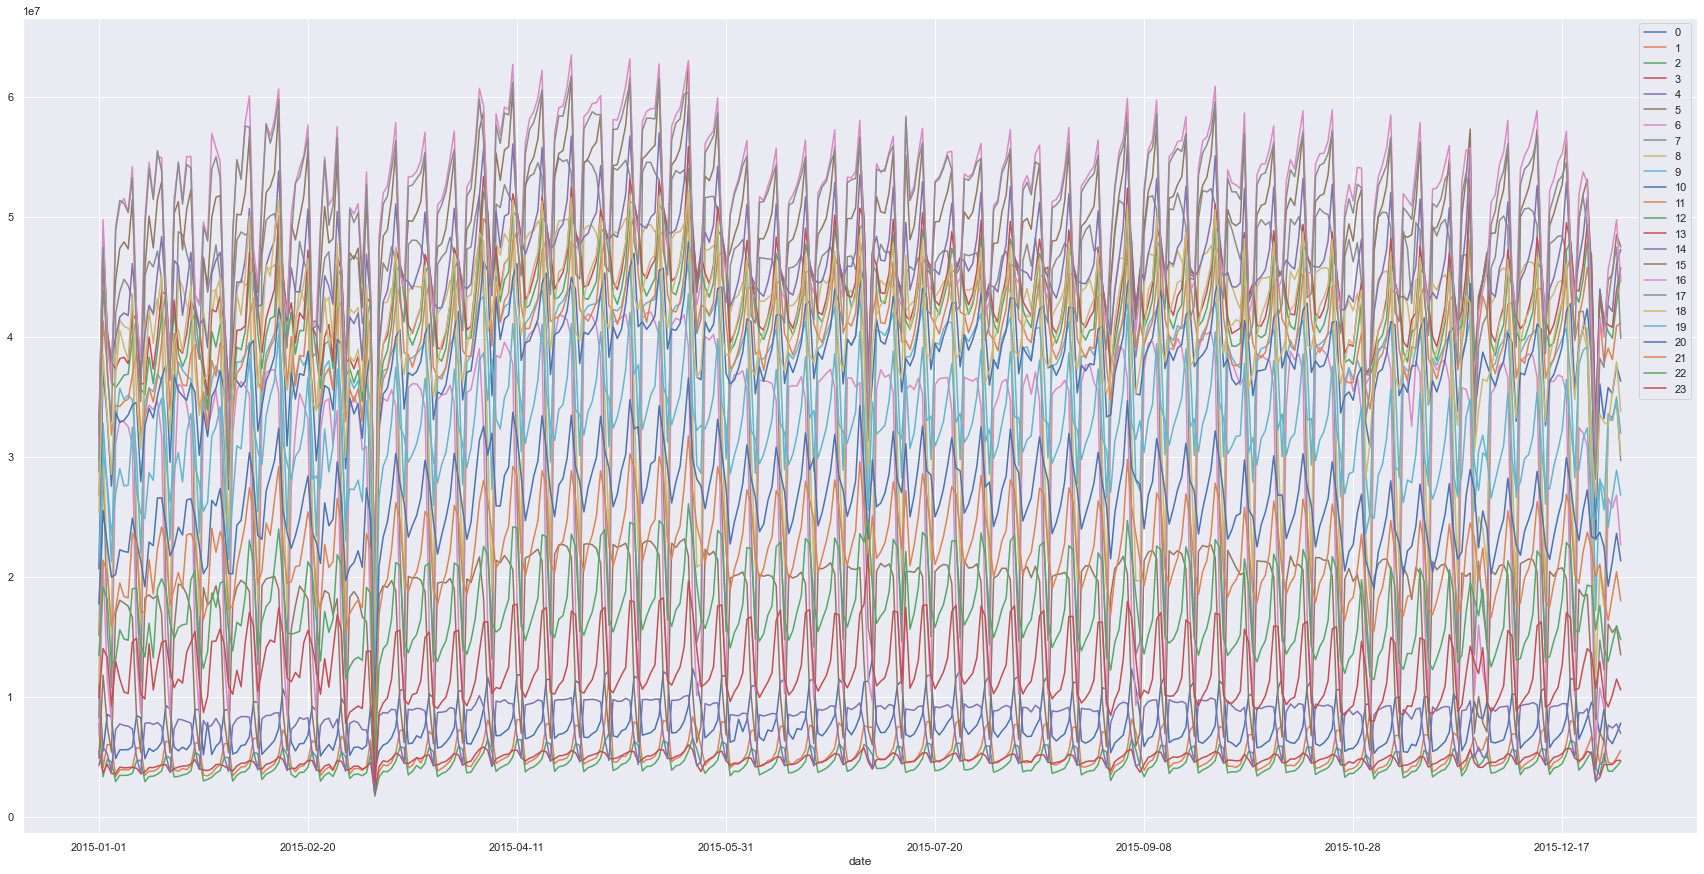

In [24]:
agg_hour_daily.plot(figsize=(30,15))

### 2. Daily total traffic volume

In [25]:
agg_daily = pd.DataFrame(agg_hour_daily.apply(sum,axis=1),columns = ["total_traffic_volume"])
agg_daily.head()

,total_traffic_volume
date,
2015-01-01,421439880
2015-01-02,661490786
2015-01-03,555713011
2015-01-04,475531981
2015-01-05,634456259


<AxesSubplot:xlabel='date'>

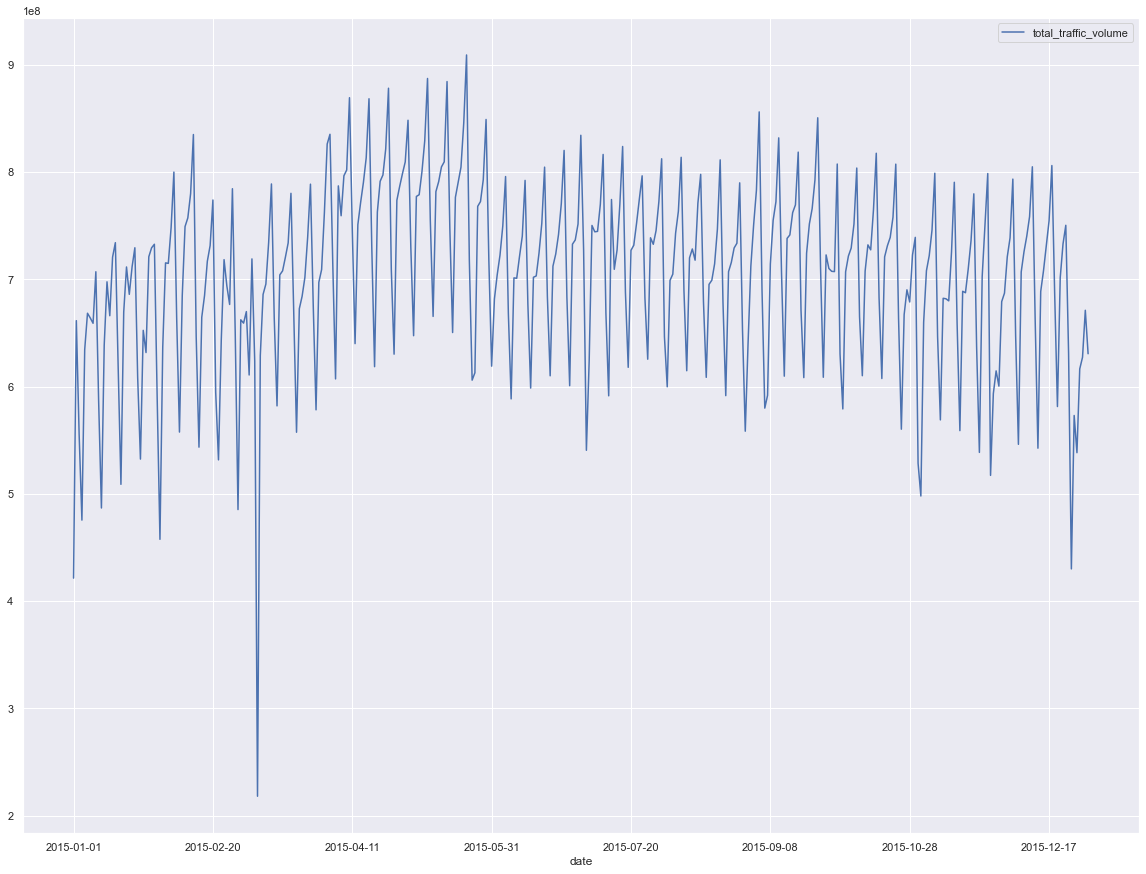

In [26]:
agg_daily.plot(figsize=(20,15))

From the plot we can clearly see that there exists seasonality among the series. One preliminary guess would be weekly seasonality.

### Let's locate which day has the largest traffic volumes!

In [27]:
print(agg_daily["total_traffic_volume"].idxmin())
print(agg_daily["total_traffic_volume"].idxmax())

2015-03-08
2015-05-22


### 3. Total monthly traffic volume

In [28]:
agg_hour_monthly = df_traffic.groupby(["month_of_data"]).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_monthly.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
month_of_data,,,,,,,,,,,,,,,,,,,,,
1,210144148,147534549,124279882,128402010,206058840,438413562,790864998,1078027923,1058742925,1005758993,...,1319763454,1431572393,1499683125,1458795614,1181567424,893382947,721728860,628539317,510038320,387393647
2,196120820,135163402,115713362,121712515,200005677,430261065,778240913,1061324428,1037535446,985188790,...,1255262592,1359989143,1430441700,1395138070,1152347284,884052925,713801303,626837538,497207825,374423021
3,222120871,153781347,130588020,140199456,231673545,483829231,863495912,1165984468,1139968457,1082049917,...,1346137017,1457131307,1522967034,1484254928,1204396023,934382250,756412628,626389990,479413498,335833300
4,248982554,170974651,144742928,154613633,256759165,545593533,984250900,1320134493,1281534330,1217415779,...,1495475957,1617515834,1683180973,1644231067,1344815988,1057287256,870930896,723274413,551759052,384534160
5,275787538,189890410,154880656,158045001,254868219,542730654,972086375,1288267329,1274213836,1252048025,...,1558456078,1658467896,1703778651,1656889771,1381203589,1105432506,923725868,781911099,605461464,425479371


<AxesSubplot:ylabel='month_of_data'>

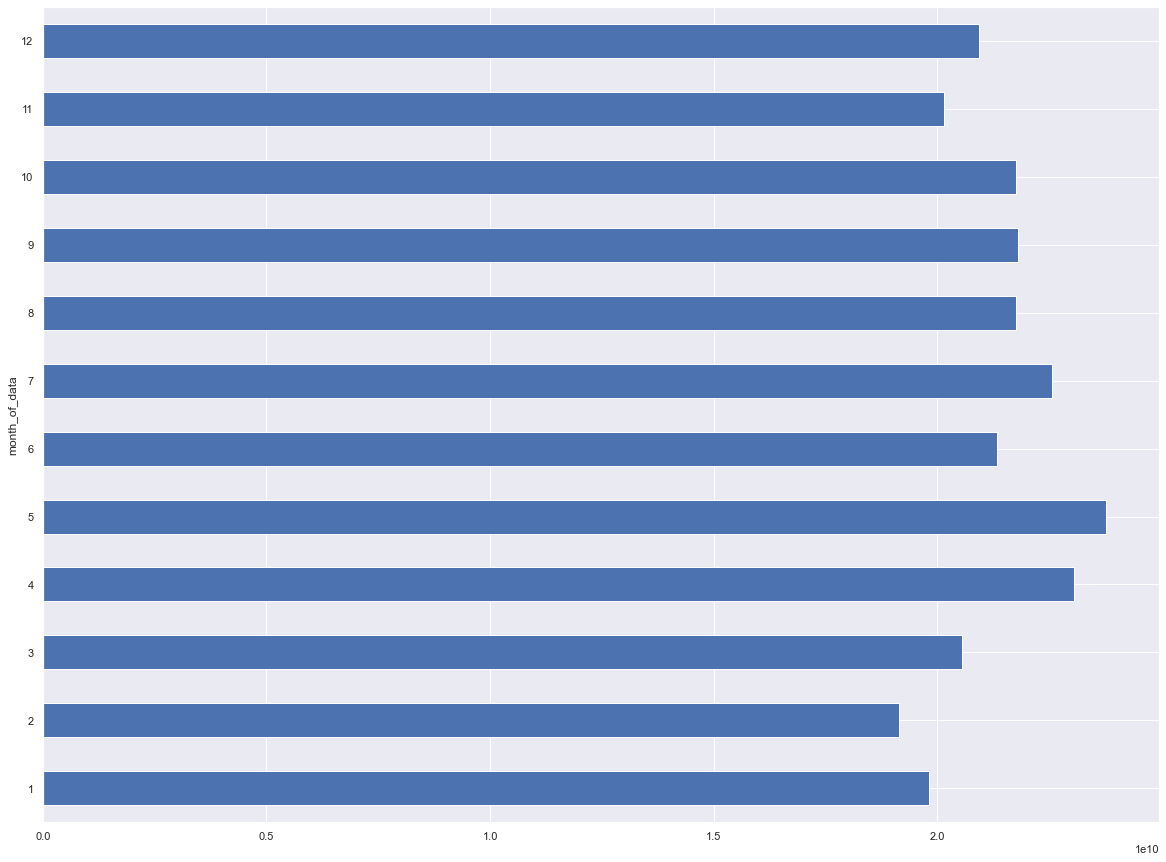

In [29]:
agg_monthly = agg_hour_monthly.sum(axis=1)
agg_monthly.plot.barh(figsize=(20,15))

### 4. Total day of the week traffic volume

In [30]:
agg_hour_dayofweek = df_traffic.groupby(["day_of_week"]).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_dayofweek.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
day_of_week,,,,,,,,,,,,,,,,,,,,,
1,548739453,375127984,287290671,223332531,223894287,322901024,503274103,710764147,1014161502,1418760469,...,2243606785,2234496078,2202990148,2080234752,1856599844,1585678430,1320589496,1052265396,789328979,539580151
2,327448517,218487181,185277370,228418340,449791278,1019429913,1811058961,2367113693,2185160018,1955173905,...,2322448779,2561268147,2718297986,2673521317,2060013787,1523610229,1206038135,991076896,741361064,521403915
3,326513646,223434761,196595644,240226047,461463877,1062209265,1915037586,2503220865,2296343496,2014884148,...,2340052889,2612825745,2796704128,2763692930,2159944388,1602371925,1281424983,1068915710,795372961,556730928
4,343914389,236345842,206819757,247758192,465068288,1065279739,1919586235,2513429001,2315382495,2045515355,...,2402059515,2656378558,2829162200,2783240643,2206502766,1653306765,1354565216,1121634815,836005437,579917836
5,371886487,260206685,225864900,260047060,468781880,1051837038,1890082770,2479580858,2301588942,2070377621,...,2489940507,2735056599,2884277107,2835335523,2285725747,1765598564,1446036125,1219440829,929237155,654911742


<AxesSubplot:ylabel='day_of_week'>

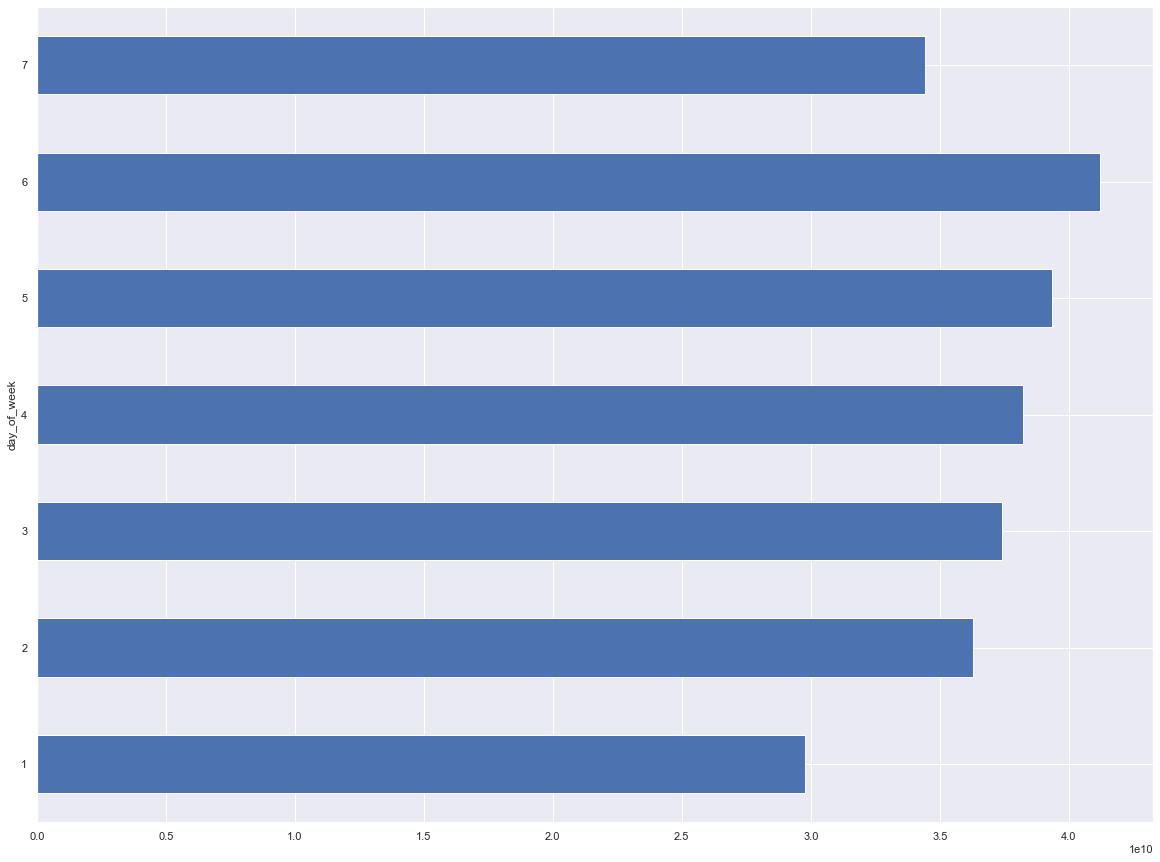

In [31]:
agg_weekly = agg_hour_dayofweek.sum(axis=1)
agg_weekly.plot.barh(figsize=(20,15))

### 5. Total day of the data traffic volume

In [32]:
agg_hour_dayofdata = df_traffic.groupby(["day_of_data"]).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_dayofdata.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
day_of_data,,,,,,,,,,,,,,,,,,,,,
1,97048721,72267153,56781688,56289235,85185209,174565394,304268578,400180200,399344754,395852362,...,510246676,540312252,554558652,538018272,444070603,351806722,290053664,242028416,189520093,133513165
2,87434578,60143657,50853566,55945232,96502519,210191809,378569658,503457801,483348040,454006446,...,557856434,602222261,629924891,616347507,499441345,386158381,315186124,264599932,208426022,147290570
3,96717205,68625502,55171466,57718326,93801231,196976368,349066116,463598441,457698817,446826883,...,552334903,590059726,610223092,593018217,488591612,379809353,310801265,263348034,207671313,148115901
4,95719271,65682350,54663843,56417916,90721338,191969142,341271563,454193475,446076414,432505051,...,546729957,583712153,602112448,584353789,482234765,377570666,310505916,263458599,211591762,153240397
5,96427775,64030207,52942771,55096758,89767182,191076099,339338236,451844310,446612749,436113465,...,543305573,582490319,607679184,595239094,491198150,387865990,316964837,268505332,207188487,150722190


<AxesSubplot:xlabel='day_of_data'>

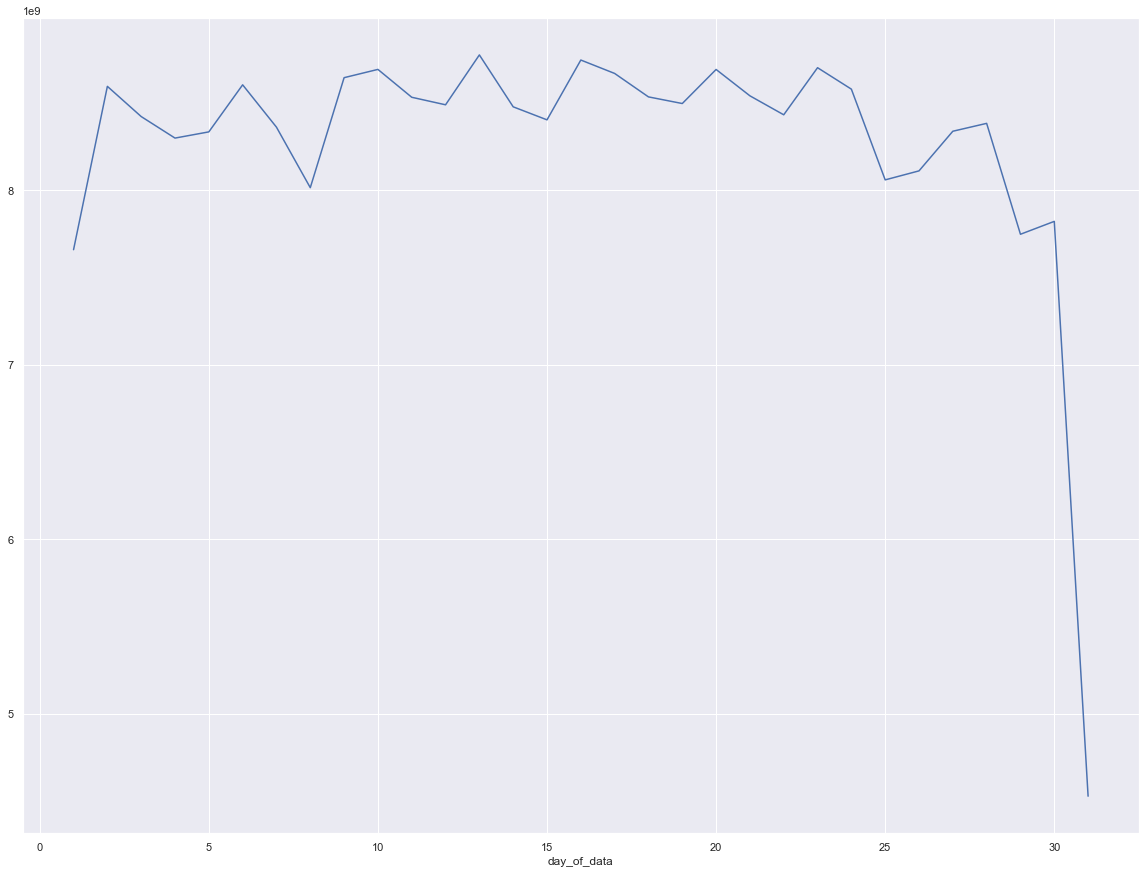

In [33]:
agg_dayofdata = agg_hour_dayofdata.sum(axis=1)
agg_dayofdata.plot(figsize=(20,15))

## Space Dimension

### 1. Total county traffic volume

In [34]:
agg_hour_county = df_traffic.groupby(['fips_county_code']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_county.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
fips_county_code,,,,,,,,,,,,,,,,,,,,,
0,31509570,22742216,19582898,21116214,34129398,69013028,120340391,162174449,157551144,157435341,...,203534598,220628324,231371650,220705912,177432607,136695138,111148601,93849933,72961160,52890788
1,52533538,35251659,28669106,29223946,45791923,101663133,192067191,274872171,272743523,267828825,...,342036882,368329535,386974031,376563999,302374132,231255737,189373246,153949372,112887896,79469506
2,1257105,888826,749607,882622,1745121,4665026,7043584,8197168,7500500,7609450,...,10445472,11666031,12284202,11600467,9064190,6817815,5562528,4376952,3085539,2009658
3,144757953,93412464,76007722,86384374,167267560,374643137,627150063,762727380,753193936,716402215,...,867398759,917654934,913026384,877110569,728690703,567514251,468450332,406763724,318825956,222639547
4,244973,190168,168557,172934,225272,370313,619107,688339,666082,707745,...,913543,964019,1027198,1057420,955916,784217,648611,529667,426295,324360


<AxesSubplot:xlabel='fips_county_code'>

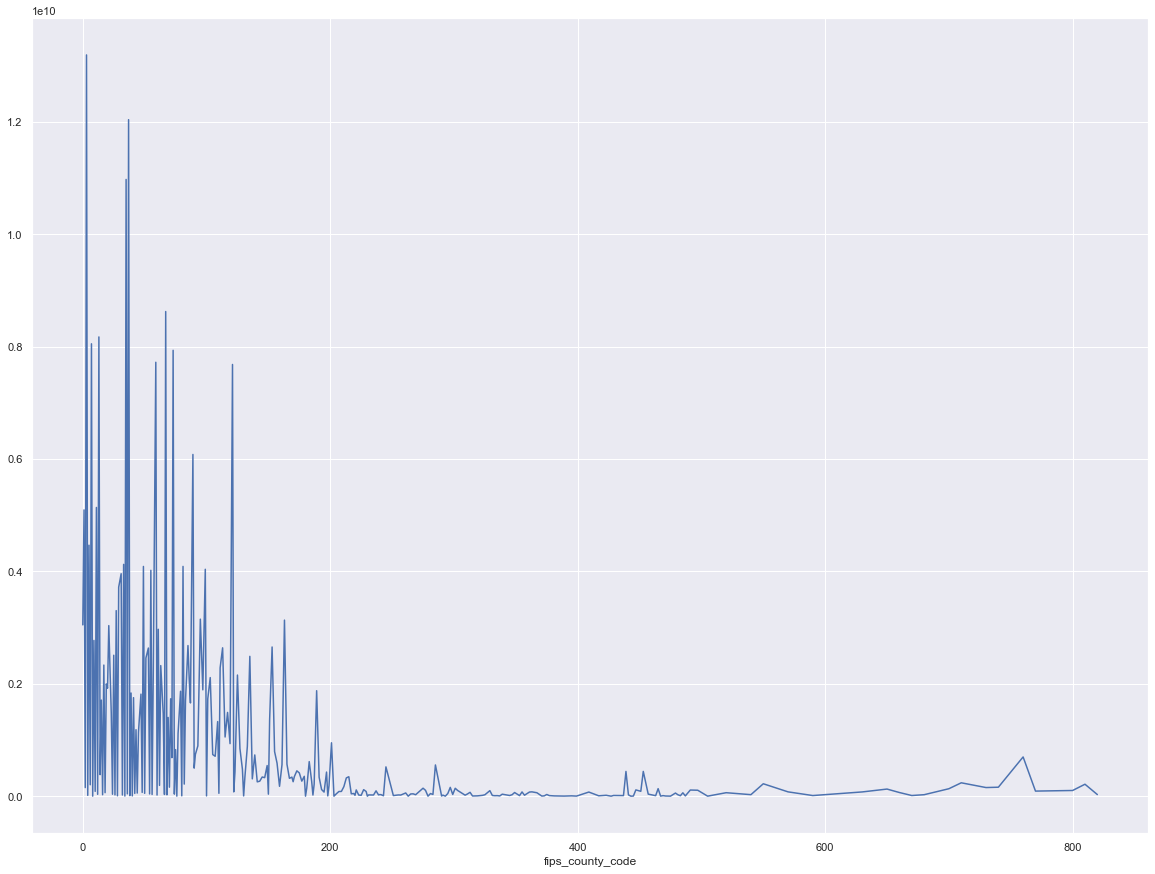

In [35]:
agg_county = agg_hour_county.sum(axis=1)
agg_county.plot(figsize=(20,15))

### 2. Total state traffic volume

In [36]:
agg_hour_state = df_traffic.groupby(['fips_state_code_x']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_state.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
fips_state_code_x,,,,,,,,,,,,,,,,,,,,,
1,93925157,68772305,59300538,63983560,99825243,207567920,385487818,531913723,484177786,461189055,...,592030134,640036622,669148421,636350371,492705847,379480702,303762677,255601013,198004794,141389729
2,17528062,11178238,8389120,7109999,9625938,22901862,49905305,88842737,85215781,78975774,...,115254697,125157068,137949510,137677048,108344288,81112265,65740822,54647821,39522257,26095836
4,66854313,46900049,43105654,50063512,105529258,199581670,282770723,327990212,327276959,324367794,...,393965028,399811136,397169821,385039411,337588843,264367526,219353603,192262715,151780755,102501023
5,9302615,6981341,6199088,6590616,9319792,17807280,34000125,49021934,45995089,48139449,...,65279938,70139435,71814379,71123348,55182920,46544300,40527323,32993549,26280792,18891117
6,450307063,318810931,271617001,302649615,536815836,1025687810,1494037372,1814184349,1840639524,1829124566,...,2175975630,2239247512,2242166095,2172504157,1921249170,1601905863,1361437412,1203710436,969032040,678372457


<AxesSubplot:ylabel='fips_state_code_x'>

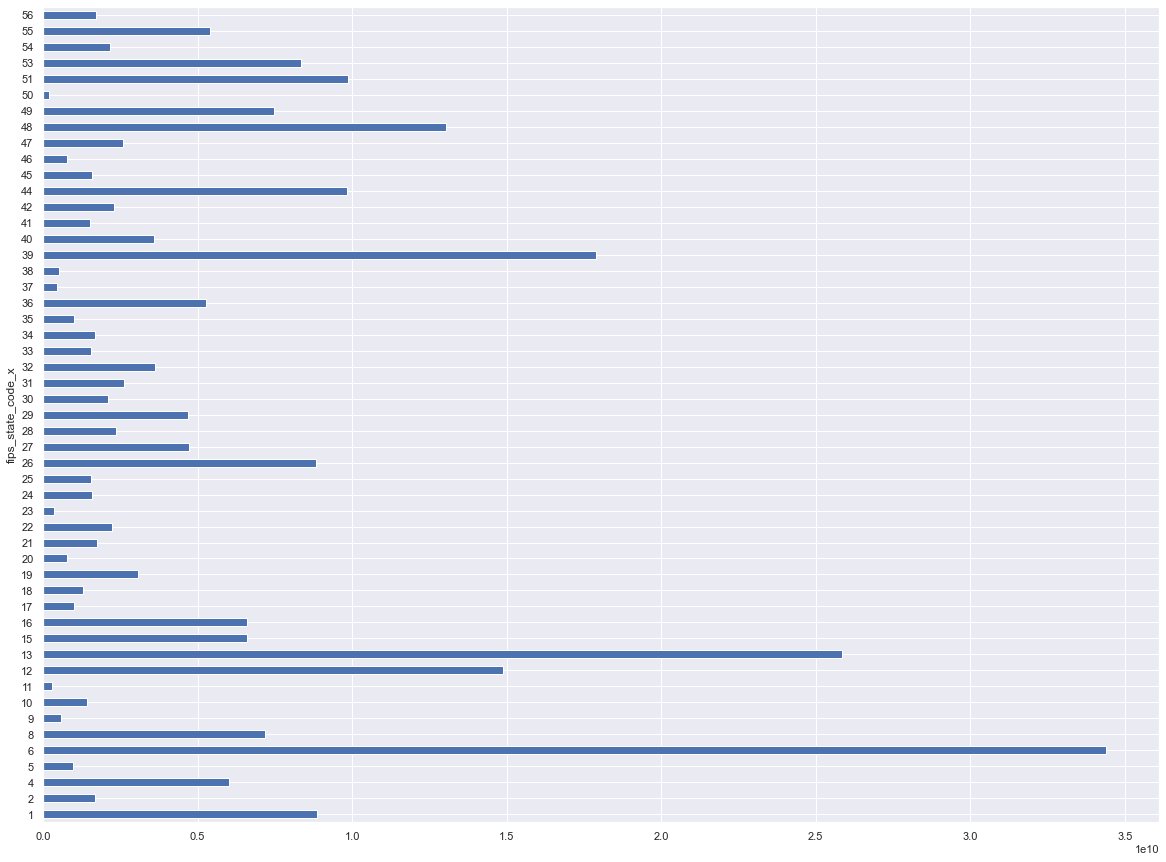

In [37]:
agg_state = agg_hour_state.sum(axis=1)
agg_state.plot.barh(figsize=(20,15))

In [38]:
### See which states are the top-5 traffic heavy states
agg_state.nlargest(5)

fips_state_code_x
6     34385969444
13    25842022948
39    17900981762
12    14893978645
48    13026379816
dtype: int64

In [39]:
### See which states are the top-5 traffic light states
agg_state.nsmallest(5)

fips_state_code_x
50    197420518
11    301221176
23    355262705
37    467076577
38    517981895
dtype: int64

### 3. Total functional_classification traffic volume

In [40]:
agg_hour_functional = df_traffic.groupby(['functional_classification_x']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_functional.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
functional_classification_x,,,,,,,,,,,,,,,,,,,,,
1R,355458998,272784927,238886191,253419362,352447387,599044556,957430467,1278571151,1375235050,1522840715,...,2016036398,2101316587,2131544160,2015649466,1662973180,1332073326,1098506792,912300148,713262990,532730717
1U,1655596328,1122487196,938574475,984904185,1622226495,3493478711,6101817482,7805121301,7587772565,7199391592,...,8784147465,9407123979,9738197830,9521003561,7975388140,6316754788,5217665758,4496262728,3590766265,2594729551
2U,433120893,288742166,235612507,251908472,455737411,989138294,1750136576,2308694384,2229167167,2061449768,...,2538623521,2747719379,2871224086,2813238481,2323019944,1800219360,1480548325,1273912561,1001418743,701436624
3R,120102739,83618808,70863485,80232385,139997819,306940453,559797720,786093883,783381179,819019841,...,1043993460,1127979940,1181756583,1133904881,868745728,644543894,509945691,404350648,291706528,194849205
3U,220189273,141820272,110789346,108817894,185166267,430381388,885657952,1364864860,1357806661,1311112282,...,1712353576,1838428304,1924020129,1881462158,1495488679,1141644743,912227715,732691518,534753814,363936163


<AxesSubplot:ylabel='functional_classification_x'>

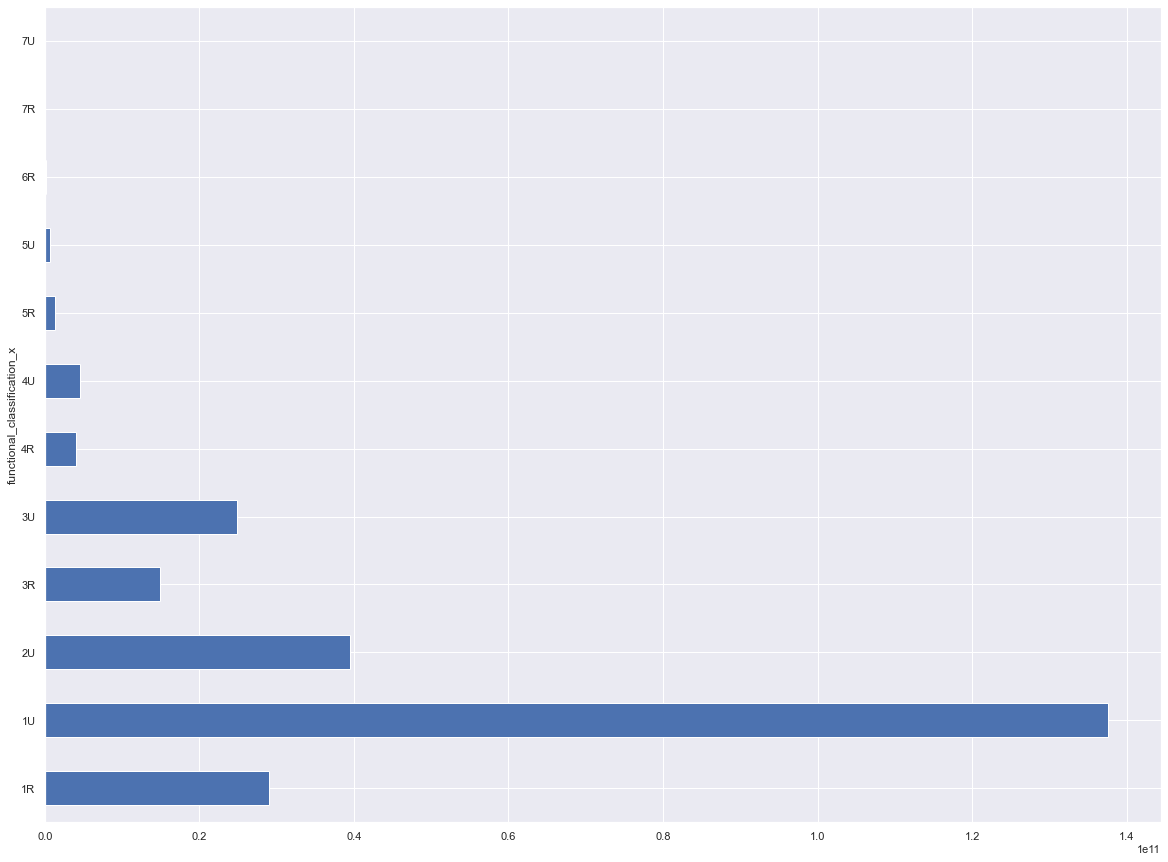

In [41]:
agg_functional = agg_hour_functional.sum(axis=1)
agg_functional.plot.barh(figsize=(20,15))

### 4. Total station traffic volume

In [42]:
agg_hour_station = df_traffic.groupby(['station_id']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_station.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
station_id,,,,,,,,,,,,,,,,,,,,,
000001,12381437,8170467,6176314,6318891,9997623,22626524,39739441,54574282,57763846,56907658,...,70773903,76569375,80058502,78997756,64315056,50964953,41764121,33019393,24593271,17852182
000002,6272707,4673591,4290099,5091147,8360020,17082714,28868593,36007238,35223570,36230354,...,43781636,46353958,48034416,46013045,37105488,28360749,22826187,18294877,13483502,9223767
000003,13329215,8188127,6121743,6325956,11536713,32730353,76675429,113987382,112699947,110369676,...,134602302,146931373,150455924,144862242,115677914,84859647,66612550,53515096,37439111,23326626
000004,19323953,14432004,12273544,12219307,19354022,41990353,76893174,93463086,94422889,97130953,...,126767504,137557596,140010421,132077394,107586267,83220324,66132949,54188728,40305707,27849175
000005,2608767,1730401,1387784,1545592,2886993,6669507,13280107,20040439,18430146,18554109,...,25129180,27873963,30277469,29487301,21561477,16071289,12645263,9462717,6394271,4159333


<AxesSubplot:xlabel='station_id'>

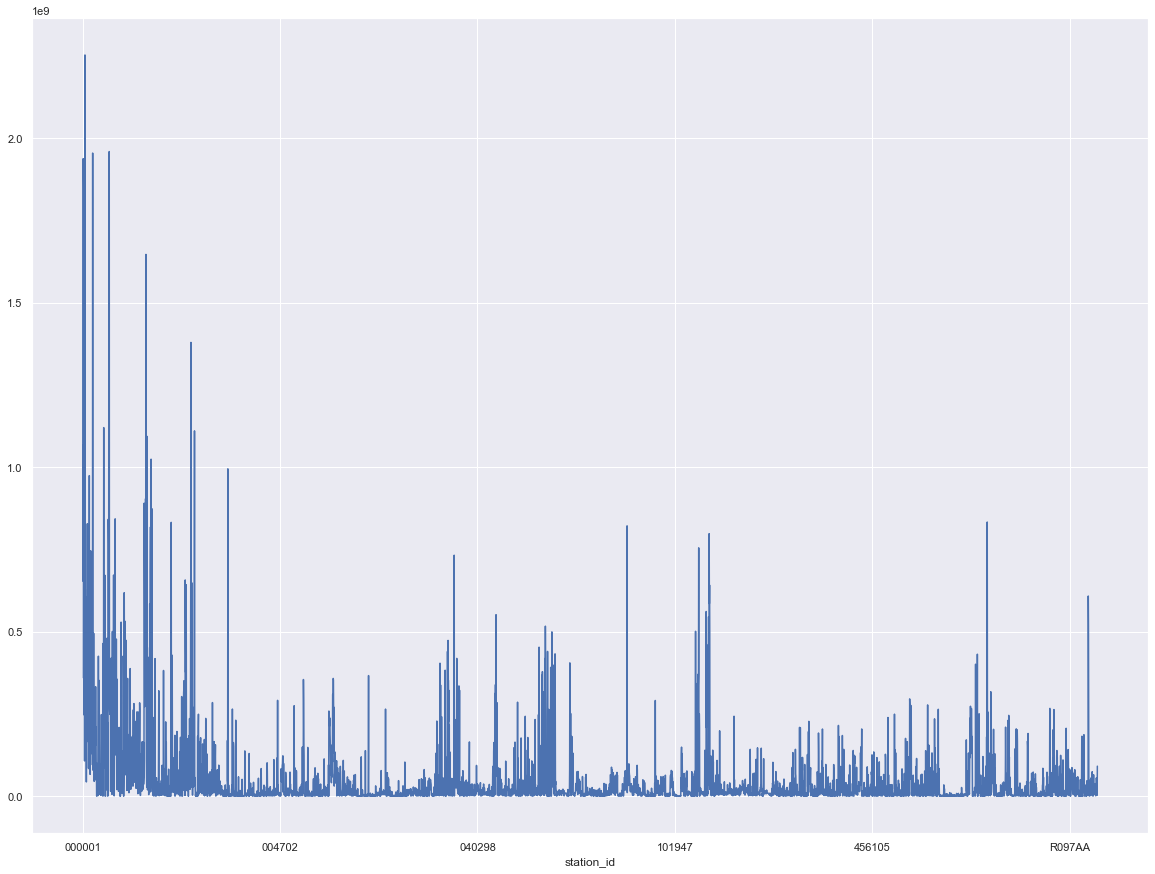

In [43]:
agg_station = agg_hour_station.sum(axis=1)
agg_station.plot(figsize=(20,15))

In [44]:
agg_station.nlargest(5)

station_id
000012    2253974852
000126    1960292444
000050    1955668782
000003    1938541657
000124    1924162066
dtype: int64

### 5. Total lane_of_travel traffic volume

In [45]:
agg_hour_lane = df_traffic.groupby(['lane_of_travel_x']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_lane.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
lane_of_travel_x,,,,,,,,,,,,,,,,,,,,,
0,1112401913,769905340,654642458,684349928,1163948389,2436316615,4076666887,5253702970,5213553849,5034447495,...,6156053789,6523188217,6699722062,6554316756,5498940908,4342826242,3578251506,3058066332,2404064526,1687088798
1,671945792,477249637,404367184,427734329,654903917,1290617816,2283999677,3181901256,3192271232,3179896850,...,3981172524,4251352817,4415906723,4292238277,3501463700,2744802968,2260571523,1890424680,1465733075,1074303783
2,562715061,384039785,315144262,328050840,520178788,1101206744,2030666020,2781471151,2713254715,2663532676,...,3436379468,3700880301,3863198238,3736749925,3012126569,2348715170,1923292498,1611247972,1248363661,908016974
3,299254555,192799138,152841546,161501613,275260315,634432314,1224921441,1633055702,1568071941,1467826591,...,1850785703,2016011297,2115473464,2058243412,1664870946,1284412884,1040908851,880793991,689748234,488788287
4,134761815,86011810,68842674,76142072,135712915,325415283,617361711,788992047,746656795,687113222,...,856571102,937703413,982186402,952115948,779830541,596705119,478947509,410139098,320616227,224015536


<AxesSubplot:xlabel='lane_of_travel_x'>

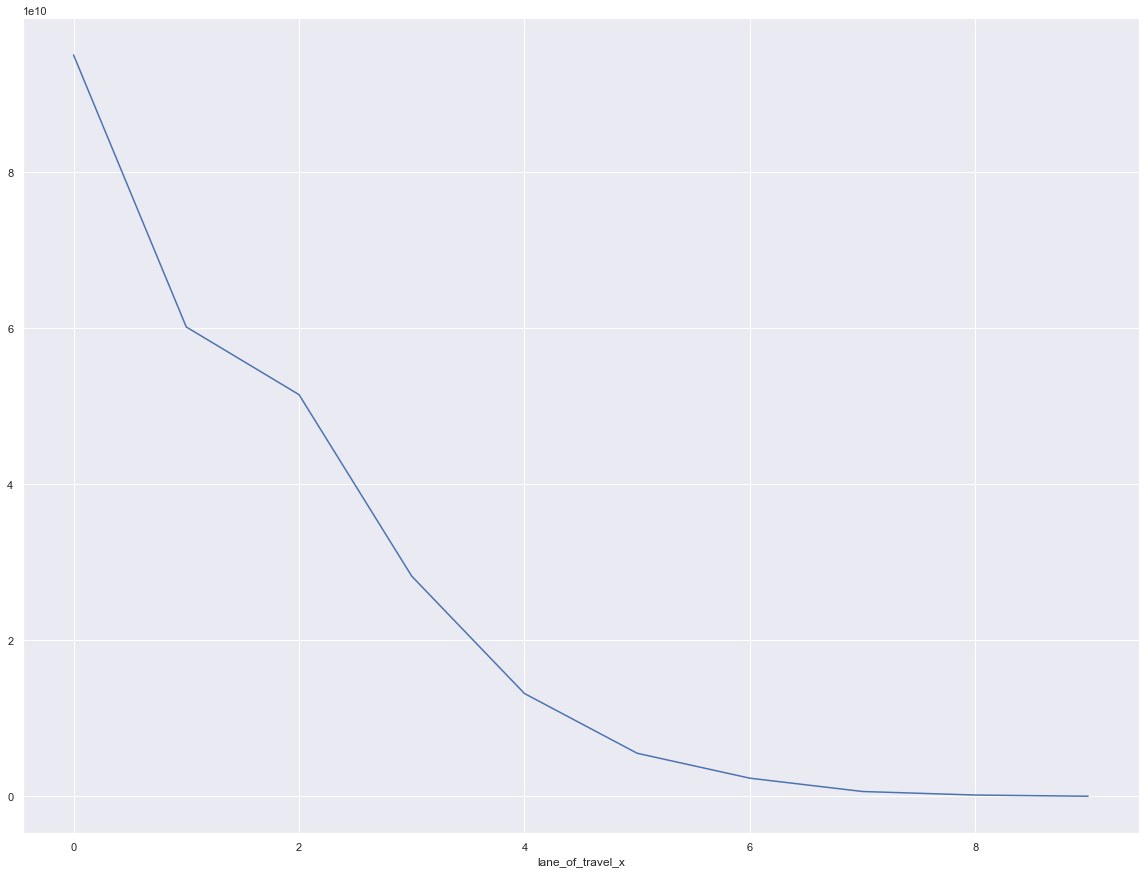

In [46]:
agg_lane = agg_hour_lane.sum(axis=1)
agg_lane.plot(figsize=(20,15))

### 6. Total direction_of_trave traffic volume¶

In [47]:
agg_hour_direction = df_traffic.groupby(['direction_of_travel']).sum().loc[:,US_traffic_2015.columns[13:-1]]
agg_hour_direction.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
direction_of_travel,,,,,,,,,,,,,,,,,,,,,
0,7812226,5269696,4373759,4541269,6967671,14587648,31233126,47685692,47567584,45975370,...,58300120,61916978,64536070,63301724,50117461,37340160,28997762,23071249,17281303,12041232
1,909228033,623290182,516423237,537108916,865681582,1842936057,3299509171,4394043741,4319332809,4175950358,...,5237363361,5614386424,5821371175,5666577541,4661157112,3665890297,3005943058,2540294430,1991429784,1421012950
2,4003175,2478101,2002836,1909210,3520690,7753875,14763709,22199041,21416056,20781448,...,27129615,30672420,32448220,31798060,23839756,17615862,14254566,11913576,9049347,6291227
3,534967344,363322961,300390799,312391676,519749040,1097501644,1940750461,2597363991,2567611920,2471652168,...,3115936989,3337344748,3455486462,3364915739,2777535502,2174665422,1787150855,1514284559,1185414700,848590318
4,4173448,2735404,2316895,3164097,6021815,14707113,26517744,35382318,32422685,31548509,...,39373667,42036200,44716178,43421752,33282097,24293480,19362868,15962019,11304186,7156745


<AxesSubplot:ylabel='direction_of_travel'>

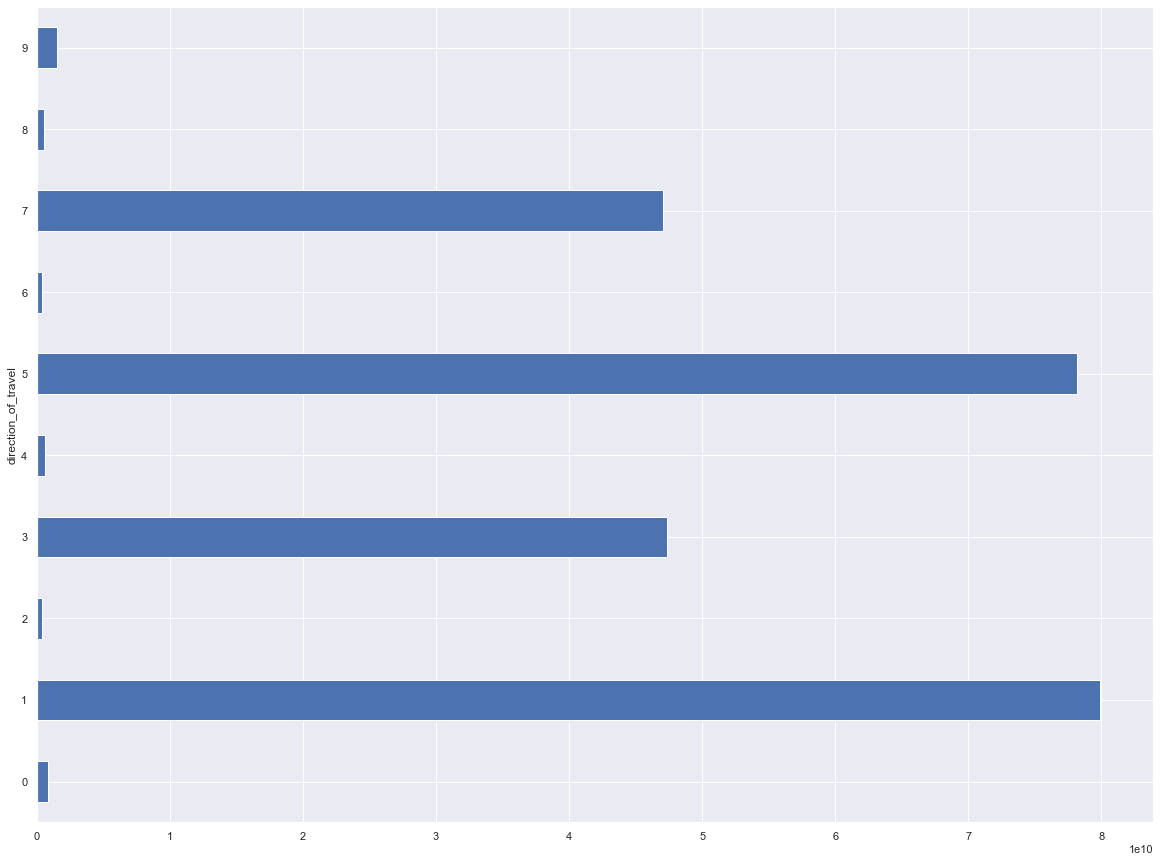

In [48]:
agg_direction = agg_hour_direction.sum(axis=1)
agg_direction.plot.barh(figsize=(20,15))

**From the EDA we could conclude that in the year of 2015:**

**TIME DIMENSION**
1. There exists strong positive linear relationship amoung hours (4,5,6,7,8), (19,20,21,22)
2. **DAILY**: On average, in a day, traffic volume between 0200-0300 is the lowerst and the highest between 1600-1700 **AND** The total daily traffic volume is the largest on '2015-05-22'and lowest on '2015-03-08'
3. **WEEKLY**: The traffic volume is the lowest during weekends, especially on Sunday while the higest on Friday. And there is a monotonic increasing trend from Monday to Friday
4. **MONTHLY**: Feb is the month with the lowest total traffic volume and May is the month with the largest total traffic volume


**SPACE DIMENSION**
1. **County**: 90% of the traffic are concentrated within county code from 0-150
2. **State**: State 6(California), 13(Georgia), 39(Ohio), 12(Florida) and 48(Texas) are the top-5 states with largest yearly traffic volumes and  50(Vermont), 11(Delaware), 23(Maine),37(North Carolina) and 38(North Dakota) are top 5 states with the smallest yearly traffic volumes
3. **Road Function**: 1U (Urban: Principal Arterial - Interstate), 2U ('Urban: Principal Arterial - Other Freeways or Expressways') and 1R (Rural: Principal Arterial - Interstate) are the top 3 busiest roads in the US
4. **Station**: stations 000012, 000126, 000050, 000003, 000124 are the top 5 stations with the largest yearly traffic volumes 
5. **Direction**: North and South are the two directions with the heaviest traffic volumes

<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Feature Engineering</p>

As discussed previously, I have choose the following features that are most interesting and carrying the richest info from the dataset, which include:
1. date
2. month
3. day_of_data
4. day_of_week
5. direction_of_travel
6. fips_state_code
7. station_id
8. functional_classification_x
9. lane_of_travel_x
10. fips_county_code
11. latitude
12. longitude
13. traffic_volume_counted from 0-24

I have also created a feature that aggregates the hourly traffic based on the time and space dimension that we are looking into.

<a id="4"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Data Transformation And Preprocessing</p>



## Taking care of missing data

In [49]:
###Here I fill the missing values as zero
df_traffic.fillna(0)

,month_of_data,date,day_of_data,day_of_week,direction_of_travel,fips_state_code_x,station_id,functional_classification_x,lane_of_travel_x,fips_county_code,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
0,4,2015-04-07,7,3,1,56,000084,3R,1,147,...,129,89,122,124,110,69,73,28,12,6
1,4,2015-04-07,7,3,1,56,000084,3R,1,39,...,129,89,122,124,110,69,73,28,12,6
2,7,2015-07-03,3,6,1,48,000084,5R,0,147,...,17,25,10,20,19,9,9,5,3,4
3,7,2015-07-03,3,6,1,48,000084,5R,0,39,...,17,25,10,20,19,9,9,5,3,4
4,9,2015-09-23,23,4,1,56,000084,3R,1,147,...,370,335,358,364,266,182,167,129,53,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25026061,1,2015-01-01,1,5,1,6,074870,2U,0,37,...,2306,6288,6180,6149,2068,5263,1842,4485,1376,2806
25026062,1,2015-01-01,1,5,1,6,074870,2U,0,37,...,2306,6288,6180,6149,2068,5263,1842,4485,1376,2806
25026063,1,2015-01-01,1,5,1,6,074870,2U,0,37,...,2306,6288,6180,6149,2068,5263,1842,4485,1376,2806
25026064,1,2015-01-01,1,5,1,6,074870,2U,0,37,...,2306,6288,6180,6149,2068,5263,1842,4485,1376,2806


<a id="5"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Model Building and Fitting</p>

For this project, I have decided to use **clustering** to find patterns in the data. The reason is that unsupervised ML model will be very helpful to assist in looking for patterns among the data. 

Since it is not a prediction model, I will not split my data into training, validation and test set, but instead I will train the model using the entire dataset.

Similarty to my EDA, I will do clustering based on time and space dimensions. Hence build the following clustering model:
1. Aggregate daily hourly traffic volume


2. Aggregate daily total traffic volume


3. Aggregate monthly total traffic volume


4. Aggregate weekly traffic volume


5. Aggregate state traffic volume


6. Aggregate county traffic volume


7. Aggregate road traffic volume


8. Aggregate station traffic volume

### Aggregate Hours Daily

In [50]:
agg_hour_daily.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11121638,11072566,7784783,5481275,4280195,4889993,6751819,8272270,11040521,15167481,...,32352557,31991001,30939932,28739711,25372736,21250009,17744638,15106230,13448023,9931701
2015-01-02,5505481,4131389,3366306,3682844,5816091,11814275,21228862,30060216,31124990,32809732,...,48195331,48840754,49761477,47468177,38561011,30430171,25532955,21405772,19178163,14042084
2015-01-03,8551455,6035407,4804495,4396234,5264720,7566965,11465046,15575720,20796455,27355236,...,40249526,40607605,39626393,36984192,33309797,27719974,22645608,20336099,18139759,13324682
2015-01-04,8313885,6002778,4589240,3614023,3813650,5409479,7993093,10797991,15167537,21262224,...,38200685,37724577,36133646,32981290,28545874,23507841,19981433,15881272,12711846,9253005
2015-01-05,4875582,3366451,2948346,3625621,7296984,17000664,31137291,41959793,38391326,32736605,...,39940818,44730024,48818817,49104610,36761280,26933784,20215705,17309859,13146586,12977239


### Using the elbow method to find the optimal number of clusters

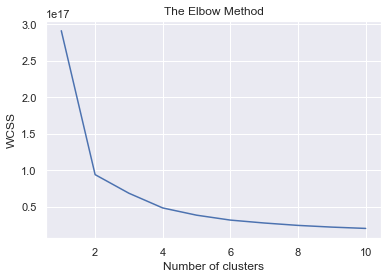

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(agg_hour_daily.dropna(axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
##we would choose number of cluster = 2 based on The Elbow Method
kmeans_model_day = KMeans(n_clusters = 2 , random_state =1)
good_columns = agg_hour_daily.dropna(axis=1)
kmeans_model_day.fit(good_columns)
#get the clusters
labels = kmeans_model_day.labels_

### Now let's look at the dataset with labels

In [53]:
agg_hour_daily["labels"] = labels
agg_hour_daily.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,labels
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11121638,11072566,7784783,5481275,4280195,4889993,6751819,8272270,11040521,15167481,...,31991001,30939932,28739711,25372736,21250009,17744638,15106230,13448023,9931701,1
2015-01-02,5505481,4131389,3366306,3682844,5816091,11814275,21228862,30060216,31124990,32809732,...,48840754,49761477,47468177,38561011,30430171,25532955,21405772,19178163,14042084,1
2015-01-03,8551455,6035407,4804495,4396234,5264720,7566965,11465046,15575720,20796455,27355236,...,40607605,39626393,36984192,33309797,27719974,22645608,20336099,18139759,13324682,1
2015-01-04,8313885,6002778,4589240,3614023,3813650,5409479,7993093,10797991,15167537,21262224,...,37724577,36133646,32981290,28545874,23507841,19981433,15881272,12711846,9253005,1
2015-01-05,4875582,3366451,2948346,3625621,7296984,17000664,31137291,41959793,38391326,32736605,...,44730024,48818817,49104610,36761280,26933784,20215705,17309859,13146586,12977239,0


In [54]:
agg_hour_daily[agg_hour_daily["labels"]==0]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,labels
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,4875582,3366451,2948346,3625621,7296984,17000664,31137291,41959793,38391326,32736605,...,44730024,48818817,49104610,36761280,26933784,20215705,17309859,13146586,12977239,0
2015-01-06,5593961,3924219,3472703,4154414,7761479,18058800,33042395,43801291,41424272,35728641,...,47396566,50975722,51379494,40551506,29028816,22269180,19499991,15600452,11507427,0
2015-01-07,5610800,3942468,3466881,4100546,7625750,17835047,32935403,44813719,40894230,34793483,...,47929298,51540725,51131330,39183262,27595538,22132337,18364518,14839036,10412139,0
2015-01-08,5614662,3922960,3490547,4115122,7577419,17576000,32528177,44284284,40736048,35161463,...,47339165,50423946,50386297,38123442,27641077,22059902,18259275,14726227,10287137,0
2015-01-09,5845837,4115538,3635089,4159350,7343728,16609470,31028672,43164066,40194263,34763557,...,51465702,54205484,53285988,43610170,32467101,24897286,23653866,19022960,14584660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-18,8284881,6103374,5217446,5697751,9440770,19876752,35245807,46914630,43922668,40754208,...,56321918,57145601,54550419,46122423,36448703,29943103,26895195,22889122,17021896,0
2015-12-21,6481424,4524933,3909962,4687688,8705153,18969425,32448383,42118379,39912581,37699751,...,49766748,51880174,49875256,38931922,28951255,23042722,19461059,15417146,10741473,0
2015-12-22,7311824,5017056,4288334,4892779,8656953,18414932,31985578,42132697,40411847,38889493,...,51879521,53757469,51709942,41069085,31529552,25526437,22097069,17701564,12533765,0


### In order to visualize the two clusters, we will use PCA to reduce the dimensionality of the data

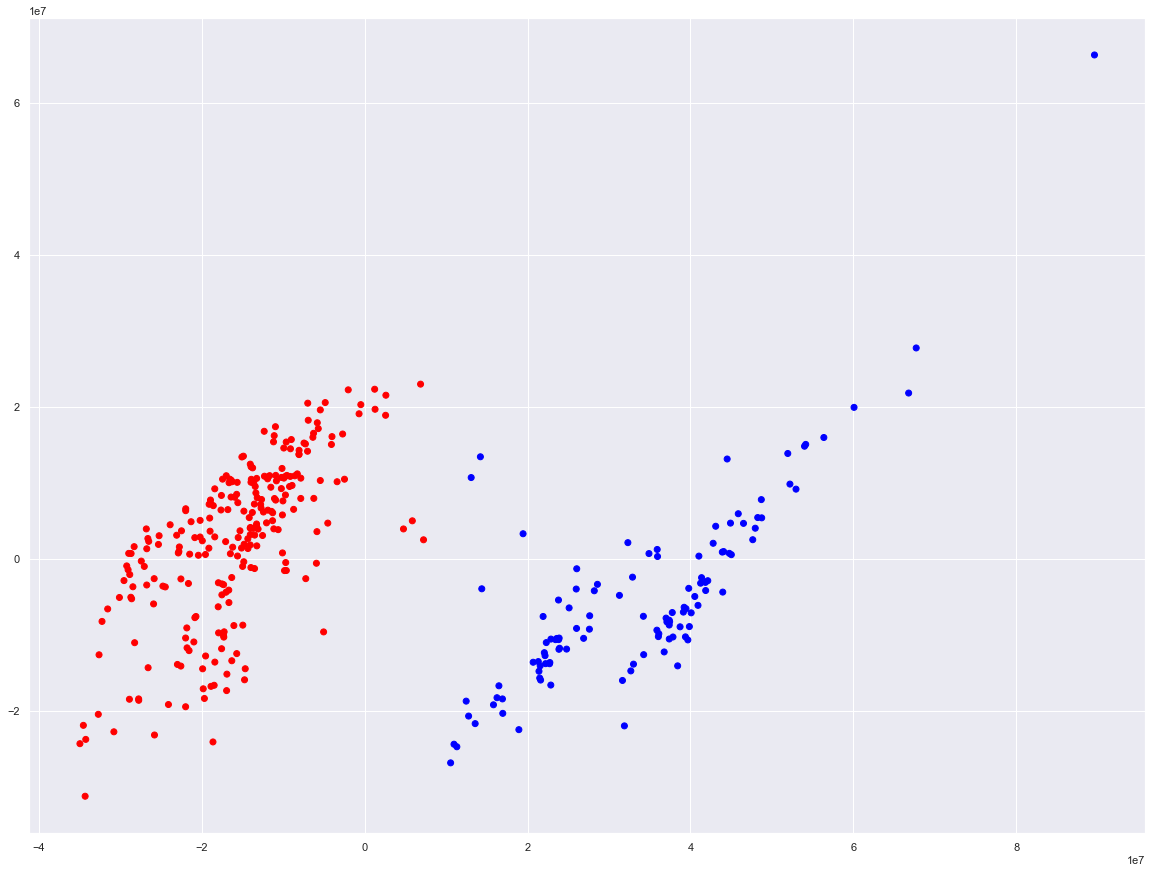

In [57]:
###reduce the data into 2 dimensions so that we could visualize
pca_2 = PCA(2)
plt.figure(figsize = (20,15))
colors = ['red','blue']
plt.columns = pca_2.fit_transform(agg_hour_daily.dropna(axis=1))
plt.scatter(x = plt.columns[:,0],y = plt.columns[:,1], c = labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Pattern 1:**

From the clustering we could see that **Aggregate daily hourly traffic volume** shows strong pattern and can be clustered into 2 distinct groups

### Aggregate Hours State

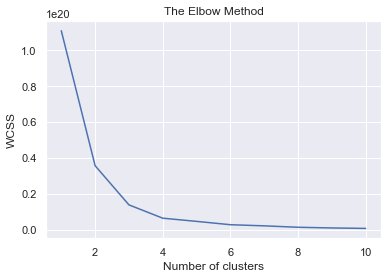

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(agg_hour_state.dropna(axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
##we would choose number of cluster = 3 based on The Elbow Method
kmeans_model_state = KMeans(n_clusters = 3 , random_state =1)
good_columns = agg_hour_state.dropna(axis=1)
kmeans_model_state.fit(good_columns)
#get the clusters
labels = kmeans_model_state.labels_

### Now let's look at the dataset with labels

In [60]:
agg_hour_state["labels"] = labels
agg_hour_state.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,labels
fips_state_code_x,,,,,,,,,,,,,,,,,,,,,
1,93925157,68772305,59300538,63983560,99825243,207567920,385487818,531913723,484177786,461189055,...,640036622,669148421,636350371,492705847,379480702,303762677,255601013,198004794,141389729,1
2,17528062,11178238,8389120,7109999,9625938,22901862,49905305,88842737,85215781,78975774,...,125157068,137949510,137677048,108344288,81112265,65740822,54647821,39522257,26095836,0
4,66854313,46900049,43105654,50063512,105529258,199581670,282770723,327990212,327276959,324367794,...,399811136,397169821,385039411,337588843,264367526,219353603,192262715,151780755,102501023,0
5,9302615,6981341,6199088,6590616,9319792,17807280,34000125,49021934,45995089,48139449,...,70139435,71814379,71123348,55182920,46544300,40527323,32993549,26280792,18891117,0
6,450307063,318810931,271617001,302649615,536815836,1025687810,1494037372,1814184349,1840639524,1829124566,...,2239247512,2242166095,2172504157,1921249170,1601905863,1361437412,1203710436,969032040,678372457,2


### In order to visualize the two clusters, we will use PCA to reduce the dimensionality of the data

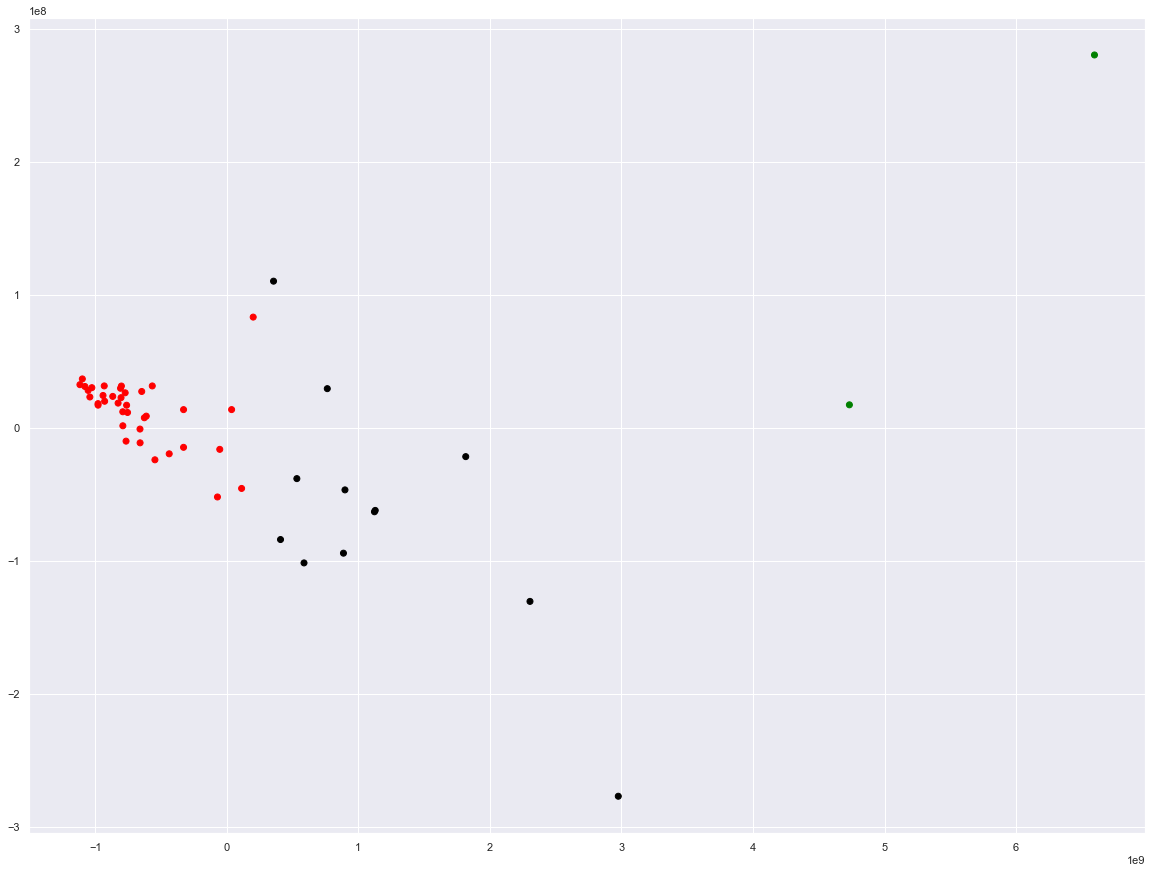

In [61]:
###reduce the data into 2 dimensions so that we could visualize
pca_2 = PCA(2)
plt.figure(figsize = (20,15))
colors = ['red',"black",'green']
plt.columns = pca_2.fit_transform(agg_hour_state.dropna(axis=1))
plt.scatter(x = plt.columns[:,0],y = plt.columns[:,1], c = labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Pattern 2:**

From the clustering we could see that **Aggregate state hourly traffic volume** shows strong pattern and can be clustered into 3 distinct groups

### Aggregate Hours County

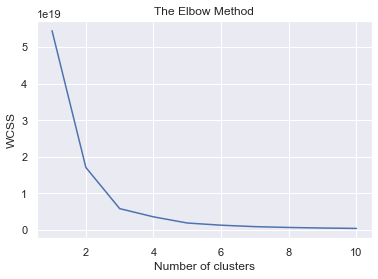

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(agg_hour_county.dropna(axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
##we would choose number of cluster = 3 based on The Elbow Method
kmeans_model_county = KMeans(n_clusters = 3 , random_state =1)
good_columns = agg_hour_county.dropna(axis=1)
kmeans_model_county.fit(good_columns)
#get the clusters
labels = kmeans_model_county.labels_

### Now let's look at the dataset with labels

In [64]:
agg_hour_county["labels"] = labels
agg_hour_county.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,labels
fips_county_code,,,,,,,,,,,,,,,,,,,,,
0,31509570,22742216,19582898,21116214,34129398,69013028,120340391,162174449,157551144,157435341,...,220628324,231371650,220705912,177432607,136695138,111148601,93849933,72961160,52890788,2
1,52533538,35251659,28669106,29223946,45791923,101663133,192067191,274872171,272743523,267828825,...,368329535,386974031,376563999,302374132,231255737,189373246,153949372,112887896,79469506,2
2,1257105,888826,749607,882622,1745121,4665026,7043584,8197168,7500500,7609450,...,11666031,12284202,11600467,9064190,6817815,5562528,4376952,3085539,2009658,0
3,144757953,93412464,76007722,86384374,167267560,374643137,627150063,762727380,753193936,716402215,...,917654934,913026384,877110569,728690703,567514251,468450332,406763724,318825956,222639547,1
4,244973,190168,168557,172934,225272,370313,619107,688339,666082,707745,...,964019,1027198,1057420,955916,784217,648611,529667,426295,324360,0


### In order to visualize the two clusters, we will use PCA to reduce the dimensionality of the data

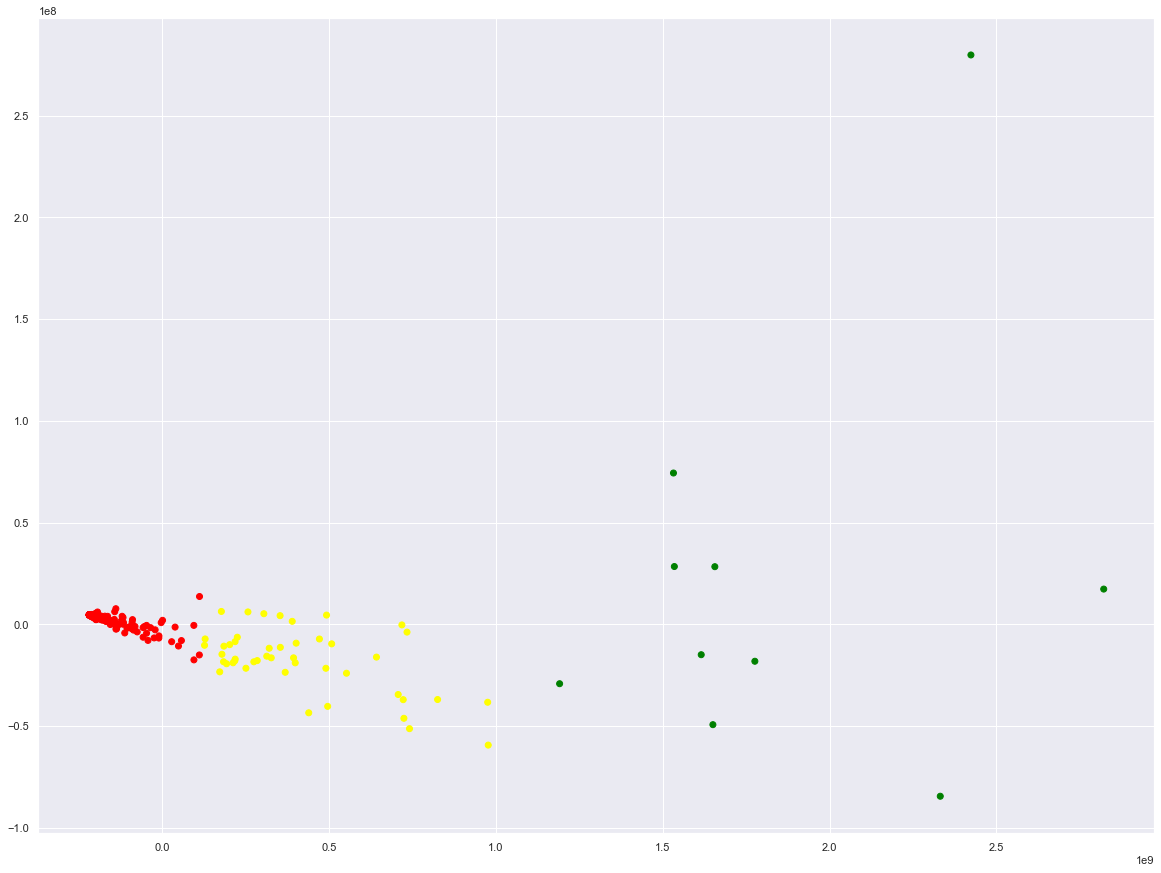

In [65]:
###reduce the data into 2 dimensions so that we could visualize
pca_2 = PCA(2)
plt.figure(figsize = (20,15))
colors = ['red','green',"yellow"]
plt.columns = pca_2.fit_transform(agg_hour_county.dropna(axis=1))
plt.scatter(x = plt.columns[:,0],y = plt.columns[:,1], c = labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Pattern 3:**

From the clustering we could see that **Aggregate county hourly traffic volume** shows strong pattern and can be clustered into 3 distinct groups

### Aggregate Hours Station

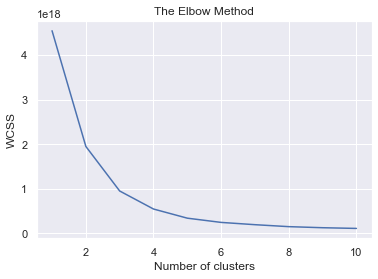

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(agg_hour_station.dropna(axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
##we would choose number of cluster = 3 based on The Elbow Method
kmeans_model_station = KMeans(n_clusters = 3 , random_state =1)
good_columns = agg_hour_station.dropna(axis=1)
kmeans_model_station.fit(good_columns)
#get the clusters
labels = kmeans_model_station.labels_

### Now let's look at the dataset with labels

In [68]:
agg_hour_station["labels"] = labels
agg_hour_station.head()

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,labels
station_id,,,,,,,,,,,,,,,,,,,,,
000001,12381437,8170467,6176314,6318891,9997623,22626524,39739441,54574282,57763846,56907658,...,76569375,80058502,78997756,64315056,50964953,41764121,33019393,24593271,17852182,1
000002,6272707,4673591,4290099,5091147,8360020,17082714,28868593,36007238,35223570,36230354,...,46353958,48034416,46013045,37105488,28360749,22826187,18294877,13483502,9223767,2
000003,13329215,8188127,6121743,6325956,11536713,32730353,76675429,113987382,112699947,110369676,...,146931373,150455924,144862242,115677914,84859647,66612550,53515096,37439111,23326626,1
000004,19323953,14432004,12273544,12219307,19354022,41990353,76893174,93463086,94422889,97130953,...,137557596,140010421,132077394,107586267,83220324,66132949,54188728,40305707,27849175,1
000005,2608767,1730401,1387784,1545592,2886993,6669507,13280107,20040439,18430146,18554109,...,27873963,30277469,29487301,21561477,16071289,12645263,9462717,6394271,4159333,2


### In order to visualize the two clusters, we will use PCA to reduce the dimensionality of the data

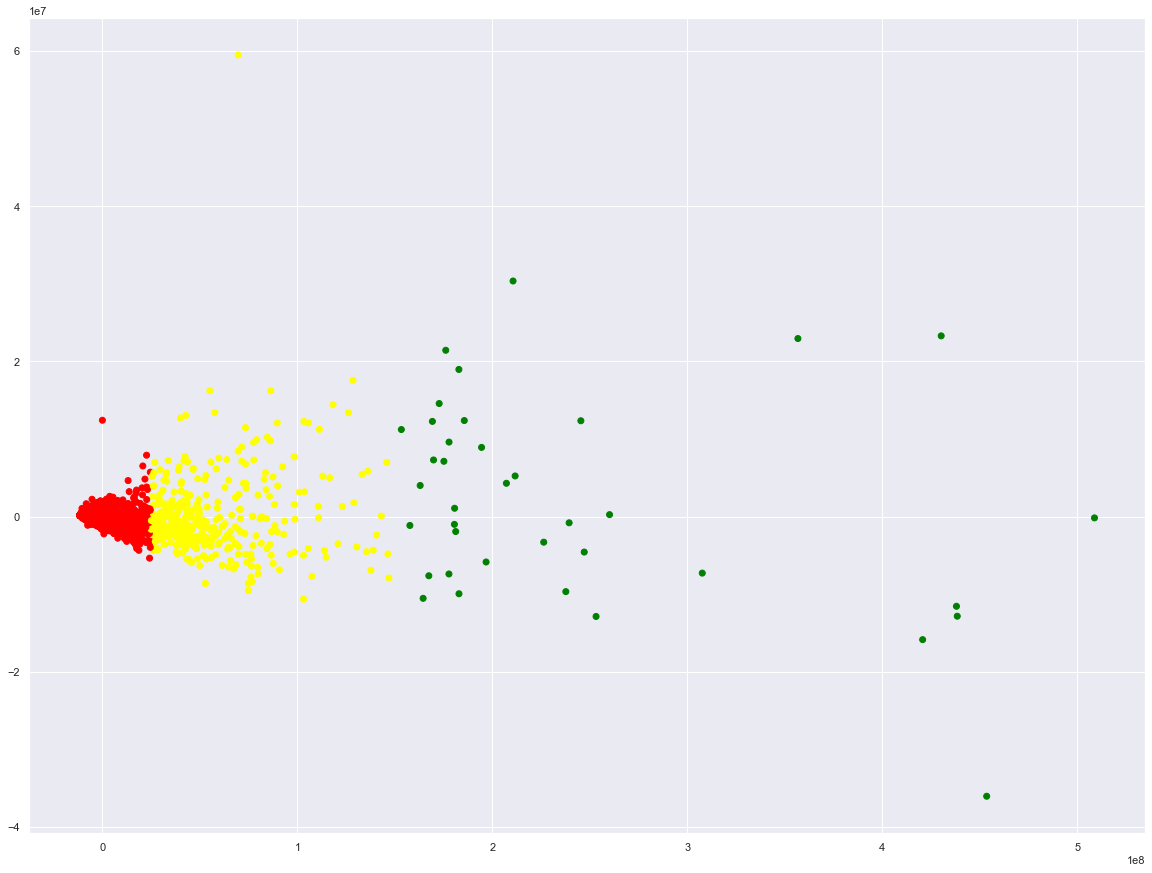

In [69]:
###reduce the data into 2 dimensions so that we could visualize
pca_2 = PCA(2)
plt.figure(figsize = (20,15))
colors = ['red','green',"yellow"]
plt.columns = pca_2.fit_transform(agg_hour_station.dropna(axis=1))
plt.scatter(x = plt.columns[:,0],y = plt.columns[:,1], c = labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Pattern 4:**

From the clustering we could see that **Aggregate station hourly traffic volume** shows strong pattern and can be clustered into 3 distinct groups

### Now let's look at the df_traffic data

In [70]:
good_columns2 = df_traffic._get_numeric_data()

In [71]:
good_columns2.head()

,month_of_data,day_of_data,day_of_week,direction_of_travel,fips_state_code_x,lane_of_travel_x,fips_county_code,latitude,longitude,traffic_volume_counted_after_0000_to_0100,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
0,4,7,3,1,56,1,147,33.54223,96.14957,4,...,129,89,122,124,110,69,73,28,12,6
1,4,7,3,1,56,1,39,43.56260,110.73322,4,...,129,89,122,124,110,69,73,28,12,6
2,7,3,6,1,48,0,147,33.54223,96.14957,1,...,17,25,10,20,19,9,9,5,3,4
3,7,3,6,1,48,0,39,43.56260,110.73322,1,...,17,25,10,20,19,9,9,5,3,4
4,9,23,4,1,56,1,147,33.54223,96.14957,10,...,370,335,358,364,266,182,167,129,53,17


### Feature Scalling to avoid one feature dominate the rest because of measuring units

In [72]:
sc = StandardScaler()
df_traffic= sc.fit_transform(good_columns2)

In [73]:
df_traffic = pd.DataFrame(df_traffic).dropna()

### Run PCA to look at the PCs that explain the majority of the variations among data

In [74]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_traffic)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [75]:
pca.explained_variance_ratio_

array([0.51141155, 0.07274018, 0.05095544, 0.03979785, 0.03341001])

The first PC explained over 51% of the variation among the data, we shall further dig into the explaination of this PC. Here I did a **Multiple Linear Regression** over the factors using the first PC as the dependant variable.

In [76]:
y = principalDf["principal component 1"].values
X = df_traffic.values

In [77]:
##split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
##run linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1.35 -1.35]
 [ 0.74  0.74]
 [ 3.29  3.29]
 ...
 [-2.31 -2.31]
 [-2.01 -2.01]
 [-1.95 -1.95]]


In [80]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ 1.62e-03  8.26e-05  6.93e-03 -3.09e-03 -2.15e-02 -2.93e-02  1.78e-03
 -1.31e-02 -1.44e-03  1.69e-01  1.70e-01  1.60e-01  1.64e-01  1.86e-01
  2.01e-01  2.08e-01  2.10e-01  2.19e-01  2.26e-01  2.25e-01  2.28e-01
  2.25e-01  2.27e-01  2.27e-01  2.25e-01  2.23e-01  2.21e-01  2.19e-01
  2.11e-01  2.02e-01  1.91e-01  1.76e-01  1.48e-01]
Coefficient of determination: 1.00


<a id="6"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Summary</p>



In this project, I used clustering and PCA to look for patterns among US Traffic 2015 data. 

As the traffic dataset are large and contains rich information, I first did an EDA to mine for general informations within the data and below are my findings:


**TIME DIMENSION**
1. There exists strong positive linear relationship amoung hours (4,5,6,7,8), (19,20,21,22)
2. **DAILY**: On average, in a day, traffic volume between 0200-0300 is the lowerst and the highest between 1600-1700 **AND** The total daily traffic volume is the largest on '2015-05-22'and lowest on '2015-03-08'
3. **WEEKLY**: The traffic volume is the lowest during weekends, especially on Sunday while the higest on Friday. And there is a monotonic increasing trend from Monday to Friday
4. **MONTHLY**: Feb is the month with the lowest total traffic volume and May is the month with the largest total traffic volume


**SPACE DIMENSION**
1. **County**: 90% of the traffic are concentrated within county code from 0-150
2. **State**: State 6(California), 13(Georgia), 39(Ohio), 12(Florida) and 48(Texas) are the top-5 states with largest yearly traffic volumes and  50(Vermont), 11(Delaware), 23(Maine),37(North Carolina) and 38(North Dakota) are top 5 states with the smallest yearly traffic volumes
3. **Road Function**: 1U (Urban: Principal Arterial - Interstate), 2U ('Urban: Principal Arterial - Other Freeways or Expressways') and 1R (Rural: Principal Arterial - Interstate) are the top 3 busiest roads in the US
4. **Station**: stations 000012, 000126, 000050, 000003, 000124 are the top 5 stations with the largest yearly traffic volumes 
5. **Direction**: North and South are the two directions with the heaviest traffic volumes

After EDA, I cleaned the data and applied PCA and clustering to look for patterns in the data. 

**PCA**: I first used PCA to reduce the dimension of the whole dataset. The first PC explains over 51% of the variation among data. Therefore, to further look for patterns, I did a multiple linear regression to see which are the factors contribute the most to the first PC.

**Cluster**: Applying clustering to 4 of my created features in both time and space dimension, I am able to find out the other 4 patterns. 


<a id="8"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">End</p>